<a href="https://colab.research.google.com/github/bgohrani/ML_Projects/blob/main/Training_ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import mean_squared_error
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier


import tensorflow as tf
import keras

#Importing essential Libraries

In [ ]:
X = np.random.rand(100,1)*2
noise = np.random.randn(100,1)*0.5
Y = 4 + (3*X) + noise

#Generating some noisy data for Linear Regression

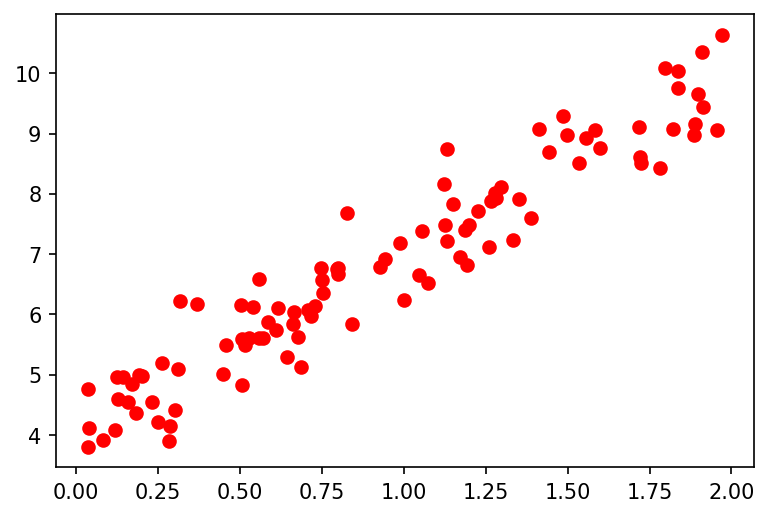

In [ ]:
plt.figure(dpi=150)
plt.scatter(X,Y,c='r')

#Plotting our created data for Visualization

In [ ]:
X_calc = np.c_[np.ones((100)),X]

#Adding x0 = 1 to each instance of our data, representing the bias

In [ ]:
term_1 = np.linalg.inv(np.matmul(np.transpose(X_calc),X_calc))
term_2 = np.matmul(term_1, np.transpose(X_calc))
final = np.matmul(term_2,Y)
print(final)

#We will use the closed form solution to this problem that minimizes the Mean Squred Error
#The solution to this problem is given by Theta = inverse(X_transpose X) X_transpose Y
#The solution Theta is such that Theta X = prediction 


[[4.09741759]
 [2.91978754]]


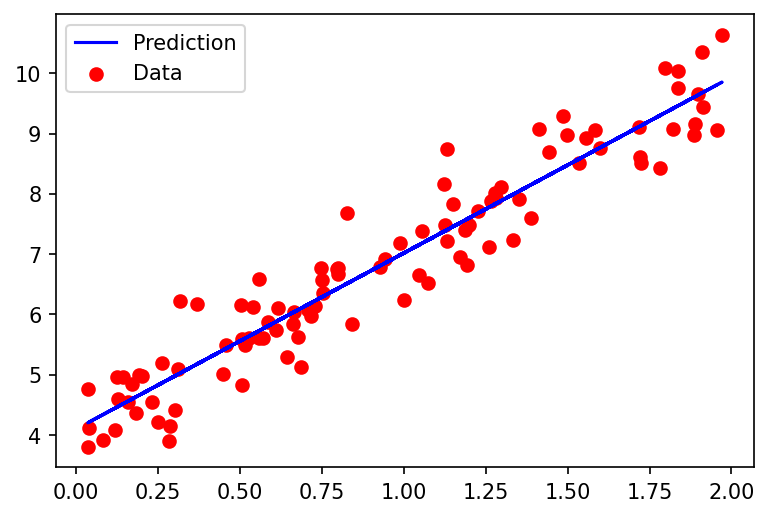

In [ ]:
plt.figure(dpi=150)
plt.scatter(X,Y,c='r')
plt.plot(X,np.matmul(X_calc,final),'b')
plt.legend(['Prediction','Data'])
plt.show()

#We can plot the prediction values along with the Data points and see the results
#Matrix multiplication of X_calc and Final gives us the predictions

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X.reshape(-1,1),Y.reshape(-1,1))

#This is also what linear regression does, we can import it from Sklearn and use it to carry out the same steps effectively

LinearRegression()

In [ ]:
print(linear_regression.intercept_, linear_regression.coef_)

#Retrieving the same values we got earlier

[4.09741759] [[2.91978754]]


In [ ]:
n = 0.25
iterations = 100
size = 100

theta_initial = np.random.randn(2,1)

for i in range(iterations):
  gradients = 2/size * X_calc.T.dot(X_calc.dot(theta_initial) - Y.reshape(-1,1))
  theta_initial -= n*gradients
print(theta_initial)

#Here we try and implement the gradient descent algorithm in order to determine the right values of theta
#We start with Randomly initializing the value of theta and computing the partial derivatives of the loss function with each of the parameters of the model
#Once we have this value, we use it as a gradient to change the value of theta
#This process is repeated until we reach a global minimum

[[4.09716967]
 [2.92001289]]


In [ ]:
#Stochastic Gradient Descent

samples = 100
epochs = 50
n = 0.25

t0, t1 = 5,45
theta_initial = np.random.randn(2,1)

def learning_schedule(t):
  return t0/(t+t1)

for i in range(epochs):
  for j in range(samples):
    random_index = np.random.randint(1,40)
    x_sample = X_calc[random_index:random_index + 1]
    y_sample = Y[random_index:random_index + 1]
    gradients = 2 * x_sample.T.dot(x_sample.dot(theta_initial) - y_sample.reshape(-1,1))
    learning_rate = learning_schedule(i*samples + j)
    theta_initial = theta_initial - (learning_rate*gradients)
print(theta_initial)

#Here we can implement Stochastic Gradient Descent, wherein updates to the weights or theta are not made after reading the whole batch of data, but just a select portion
#This makes the algorithm faster and more suited for large datasets but since all datapoints were not seen, the training is more irregular

[[4.05568084]
 [2.91210124]]


In [ ]:
sgd_regressor = SGDRegressor(penalty=None)
sgd_regressor.fit(X_calc,Y.ravel())

#We can also perform Stochastic Gradient Descent using sklearn's SGDRegressor Class

SGDRegressor(penalty=None)

In [ ]:
sgd_regressor.coef_

array([2.16759116, 2.68515502])

In [ ]:
## Non-Linear Data

X = 7*np.random.rand(100,1) - 3
Y = 0.5*X**2 + X + 2 + np.random.rand(100,1)

#For the next illustrations, we will use non-linear data which we can generate by the following equation

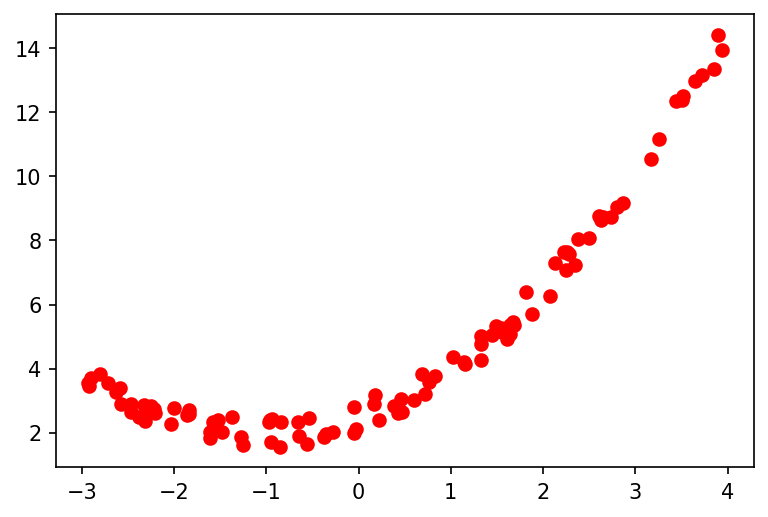

In [ ]:
plt.figure(dpi=150)
plt.scatter(X,Y,c='r')

#Plotting our data to Visualize it

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
linear_regression.fit(X_poly,Y)

#We cannot have a Linear model to fit this data and hence use Polynomial Features
#What this does is compute each instance's square and use it as a separate feature in the dataset
#We can then call linear Regression on this to fit the data

LinearRegression()

In [ ]:
linear_regression.intercept_[0]

2.4467578824836456

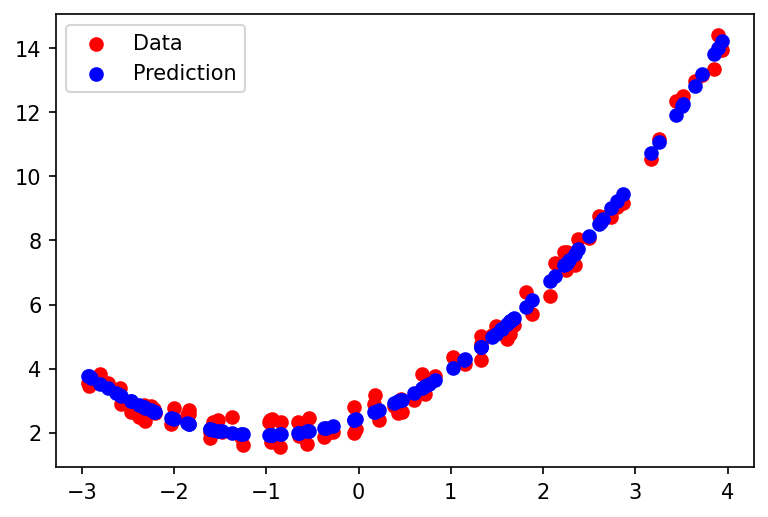

In [ ]:
plt.figure(dpi=150)
plt.scatter(X,Y,c='r')
plt.scatter(X,(linear_regression.coef_[0][1]*X**2 + linear_regression.coef_[0][0]*X + linear_regression.intercept_[0]),c='b')
plt.legend(['Data','Prediction'])
plt.show()

#We want to visualize how well the model has fit the dataset so this code helps us to do so
#We make a scatter plot of the polynomial equation

In [ ]:
def plot_learning_curves(model, X, Y):
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
  training_errors = []
  testing_errors = []
  sizes = []
  for i in range(1, X_train.shape[0]):
    sizes.append(i)
    x_sample = X_train[:i]
    y_sample = Y_train[:i]
    model.fit(x_sample,y_sample)
    train_pred = model.predict(x_sample)
    test_pred = model.predict(X_test)
    train_error = mean_squared_error(y_sample, train_pred)
    test_error = mean_squared_error(Y_test, test_pred)
    training_errors.append(train_error)
    testing_errors.append(test_error)
  
  plt.figure(dpi=150)
  plt.plot(sizes,training_errors,'r')
  plt.plot(sizes,testing_errors,'b')
  plt.xlabel('Training Data Size')
  plt.ylabel('Mean Squared Error')
  plt.title('Learning Curves')
  plt.ylim(0,5)
  plt.show()

#We wish to look at the Learning Curves, i.e. how the model performs in terms of its loss as we vary the size of the training data
#We make lists to hold values 
#Having a loop run from 1 to the training size, we take out samples frm the data and fit the Linear model and calculate the errors
#These are then plotted

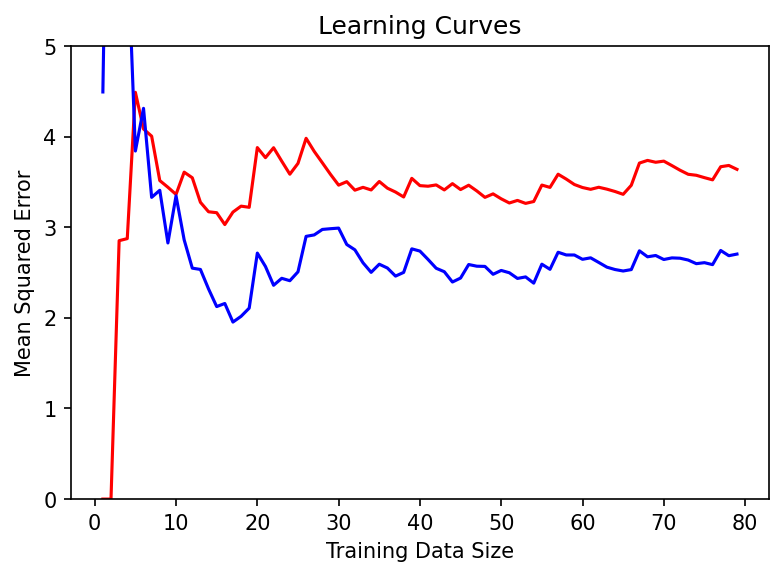

In [ ]:
linear_regression = LinearRegression()
plot_learning_curves(linear_regression,X,Y)

#The plot gives the following information
#Initially we have less samples so the training loss is low but the test loss is very high
#As the size increases, training error also increases since there is some noise in the data
#The training error increases to a certain extent and then levels out
#Since the model understands the data better, the test loss decreases until it reaches a plateau
#There is some significant loss at which the model stops improving, this is because we have used a linear model for quadratic data
#This is an example of underfitting

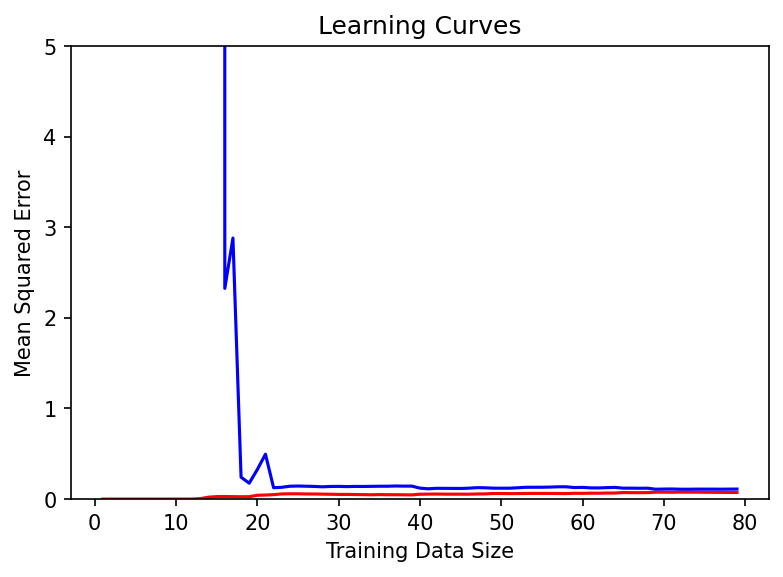

In [ ]:
polynomial_regression = Pipeline([
                                  ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
                                  ('linear_regression', LinearRegression())
])

plot_learning_curves(polynomial_regression,X,Y)

#We wish to see overfitting, when the model has more parameters than what is actually needed
#So we set up polynomial features of degree 10
#We repeat the same procedures as before

In [ ]:
X = np.random.rand(100,1)*2
noise = np.random.randn(100,1)*0.5
Y = 4 + (3*X) + noise

#We want the same linear data as before to try other models

In [ ]:
ridge_regression = Ridge()
ridge_regression.fit(X,Y)

#Ridge regression is the same as Linear Regression with regularization terms

Ridge()

In [ ]:
ridge_regression.intercept_


array([4.07988065])

In [ ]:
lasso_regression = Lasso(alpha=0.1)
lasso_regression.fit(X,Y)
print(lasso_regression.intercept_, lasso_regression.coef_)

#Lasso regression is the same as Linear Regression but with the L1 regularization term

[4.27016495] [2.69333027]


In [ ]:
elastic_regression = ElasticNet(alpha=0.1)
elastic_regression.fit(X,Y)
print(elastic_regression.intercept_, elastic_regression.coef_)

#Elastic Regression is also similar to Linear Regression but a middle ground between Rigde and Lasso Regression
#It has both the L1 and the L2 norm

[4.46988899] [2.49395333]


In [ ]:
iris = datasets.load_iris()
Y = (iris.target == 2)
X = iris.data[:,-1]

#We want to now look at Logistic Regression, which can be used for classification problems and determining probabilities
#We import the iris dataset and create a binary classificatiin problem, using one feature from the available data
#We want to use the Petal Width and determine whether the given data point belongs to the Virginica category or not

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X.reshape(-1,1), Y)

#We fit a logistic Regression model to our Iris Dataset

LogisticRegression()

In [ ]:
X_test = np.linspace(0,3,1000)
Y_pred_test = logistic_regression.predict_proba(X_test.reshape(-1,1))

#Here we want to test the working of our model and thus create some new test data set and use our trained model to predict on it

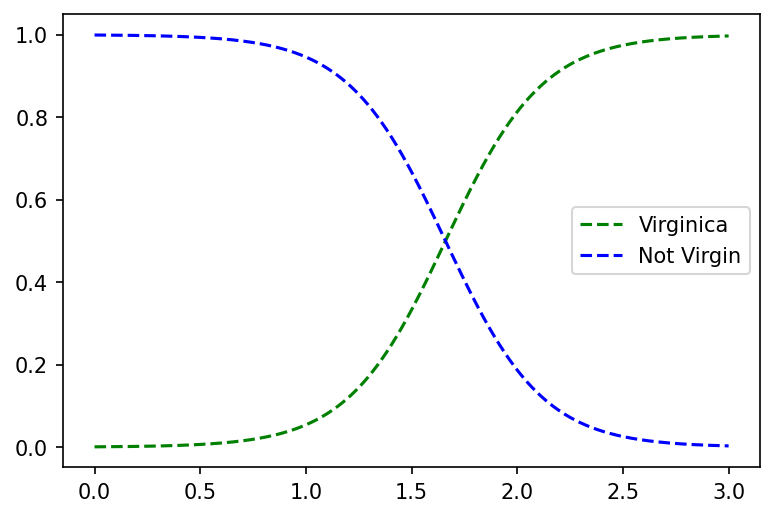

In [ ]:
plt.figure(dpi=150)
plt.plot(X_test, Y_pred_test[:,1],'g--')
plt.plot(X_test, Y_pred_test[:,0],'b--')
plt.legend(['Virginica','Not Virgin'])
plt.show()

#Here we plot the predicted probabilities of this data belonging to any of the two classes

In [ ]:
Y = iris.target 
X = iris.data[:,(2,3)]

#We can also try for multiclass classification, using two of the data features

In [ ]:
softmax_regression = LogisticRegression(multi_class='multinomial',C=10)
softmax_regression.fit(X,Y)

#Here we use multiclass feature of Logistic Regression to fit the data

LogisticRegression(C=10, multi_class='multinomial')

In [ ]:
softmax_regression.predict([[5,2]])

#Predicting on a given sample

array([2])